## 最大岛屿问题
https://leetcode-cn.com/problems/max-area-of-island/

给你一个大小为 m x n 的二进制矩阵 grid 。

岛屿 是由一些相邻的 1 (代表土地) 构成的组合，这里的「相邻」要求两个 1 必须在 水平或者竖直的四个方向上 相邻。你可以假设 grid 的四个边缘都被 0（代表水）包围着。

岛屿的面积是岛上值为 1 的单元格的数目。

计算并返回 grid 中最大的岛屿面积。如果没有岛屿，则返回面积为 0 。

 
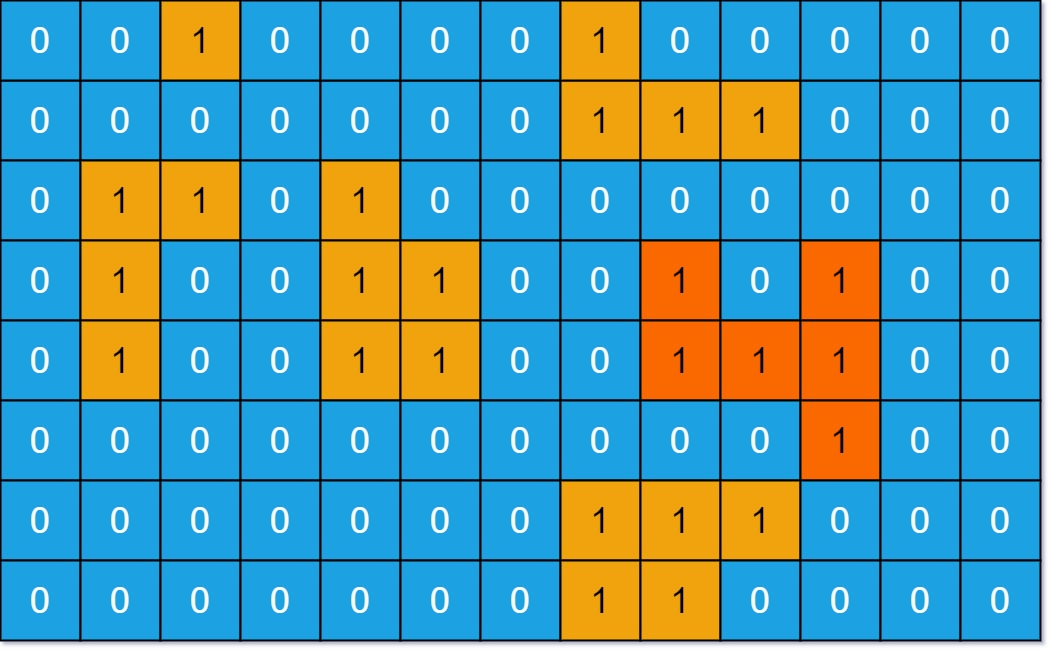

输入：grid = 
[[0,0,1,0,0,0,0,1,0,0,0,0,0],<br/>
[0,0,0,0,0,0,0,1,1,1,0,0,0],<br/>
[0,1,1,0,1,0,0,0,0,0,0,0,0],<br/>
[0,1,0,0,1,1,0,0,1,0,1,0,0],<br/>
[0,1,0,0,1,1,0,0,1,1,1,0,0],<br/>
[0,0,0,0,0,0,0,0,0,0,1,0,0],<br/>
[0,0,0,0,0,0,0,1,1,1,0,0,0],<br/>
[0,0,0,0,0,0,0,1,1,0,0,0,0]]<br/>
输出：6
解释：答案不应该是 11 ，因为岛屿只能包含水平或垂直这四个方向上的 1 。
示例 2：

输入：grid = [[0,0,0,0,0,0,0,0]]
输出：0
 

提示：

m == grid.length  <br/>
n == grid[i].length <br/>
1 <= m, n <= 50 <br/>
grid[i][j] 为 0 或 1 <br/>


In [1]:
from typing import List, Dict, Tuple, Set


# 最大岛屿面积问题: https://leetcode-cn.com/problems/max-area-of-island/

# 解法1: 近似的DBSCAN解法, 其实是广度优先算法(DFS)
# 假定:
# - 输入x为二维数组
# - 如果x对应的为0, 则不与任何节点相连, 否则寻找上下左右相连的节点, 包括自身, 记为最小邻居节点数
# - 最小邻居节点数为1
# 性能优化
class Solution:
    @staticmethod
    def get_item(grid: List[list], _n_rows: int, _n_cols: int, _i: int, _j: int) -> int:
        if _i < 0 or _i >= _n_rows or _j < 0 or _j >= _n_cols:
            return 0
        else:
            return grid[_i][_j]

    @staticmethod
    def maxAreaOfIsland(grid: List[List[int]]) -> int:
        n_rows = len(grid)
        if n_rows <= 0:
            return 0
        n_cols = len(grid[0])
        if n_cols <= 0:
            return 0
        # 构建邻接表: (x坐标, y坐标): set((邻居节点x坐标, 邻居节点y坐标), ...)
        adjacency: Dict[Tuple[int, int], Set[Tuple[int, int]]] = {}
        for row in range(0, n_rows):
            for col in range(0, n_cols):
                _each = grid[row][col]
                if _each == 0:
                    continue
                for _i, _j in [(row, col), (row - 1, col), (row, col - 1), (row + 1, col), (row, col + 1)]:
                    if Solution.get_item(grid, n_rows, n_cols, _i, _j):
                        if (row, col) in adjacency:
                            adjacency[(row, col)].add((_i, _j))
                        else:
                            adjacency[(row, col)] = {(_i, _j)}

        # 近似DBSCAN求取聚类
        # ----
        # 已访问的点集, 由于二维数目非常大, 采用set而不是0-1数组: set((x,y), ...)
        visited = set()
        # 类簇结果信息, 同样原因采用dict: {(x, y): cluster_id}
        cluster: Dict[Tuple[int, int], int] = {}

        k = -1
        for (i, j), neighbors in adjacency.items():
            k += 1
            if (i, j) in visited:
                continue
            if len(neighbors) == 0:
                # option
                visited.add((i, j))
                cluster[(i, j)] = k
                # end option
                continue
            nb: set = neighbors.copy()
            while len(nb) > 0:
                n_i, n_j = nb.pop()
                if (n_i, n_j) in visited:
                    continue
                # option
                cluster[(n_i, n_j)] = k
                visited.add((n_i, n_j))
                # end option
                if (n_i, n_j) not in adjacency:
                    continue
                for each in adjacency[(n_i, n_j)]:
                    if each not in visited:
                        nb.add(each)

        mmm = {}
        for (i, j), v in cluster.items():
            if v in mmm:
                mmm[v].add((i, j))
            else:
                mmm[v] = {(i, j)}
        return max([len(each) for each in mmm.values()]) if len(mmm) > 0 else 0

In [6]:
import unittest.case

class Max_area_of_island_suite(unittest.TestCase):
    def test_init(self):
        self.grid = [[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                     [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
                     [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]]
        self.grid2 = [[0, 0, 0, 0, 0, 0, 0, 0]]
        self.grid3 = [[0, 0, 0, 1, 0, 0, 0],
                      [0, 0, 0, 0, 1, 0, 0]]

    def test_max_area_by_dbscan(self):
        self.test_init()
        assert Solution.maxAreaOfIsland(self.grid) == 6
        print(Solution.maxAreaOfIsland(self.grid))
        assert Solution.maxAreaOfIsland(self.grid2) == 0
        print(Solution.maxAreaOfIsland(self.grid2))
        assert Solution.maxAreaOfIsland(self.grid3) == 1
        print(Solution.maxAreaOfIsland(self.grid3))


Max_area_of_island_suite().test_max_area_by_dbscan()

6
0
1
